In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution
import beamline34IDC.optimization.common as opt_common
from aps_ai.beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from aps_ai.beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback

import beamline34IDC.optimization.movers as movers
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import glob
import shutil

from skopt.callbacks import DeadlineStopper

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

37006


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [6]:
os.mkdir(temp_work_dir)

In [7]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [8]:
os.chdir(temp_work_dir)

In [9]:
input_beam_path = "primary_optics_system_beam.dat"

In [10]:
move_motors = ['hkb_1', 'hkb_2', 'vkb_1', 'vkb_2', 'hkb_3', 'vkb_3', 'hkb_4', 'vkb_4']

In [11]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [12]:
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [13]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0.2500515 0.1570341 0.1425    0.2995    3.        3.        0.
 0.       ]


hkb_1 -0.02 274.6246166406665


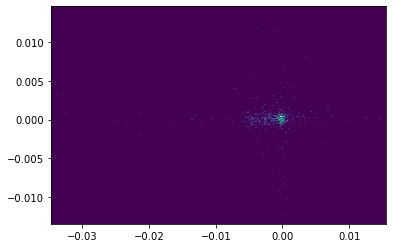

hkb_1 0.02 274.71156496521564


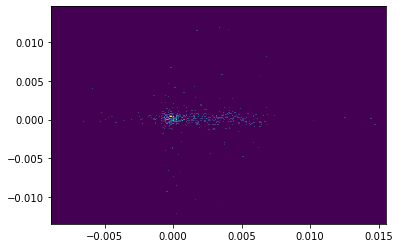

hkb_2 -0.02 274.708802948653


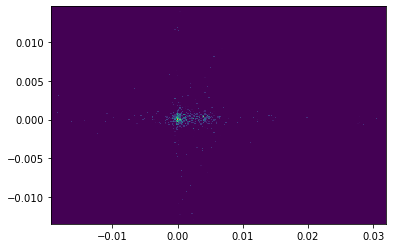

hkb_2 0.02 274.62215844052497


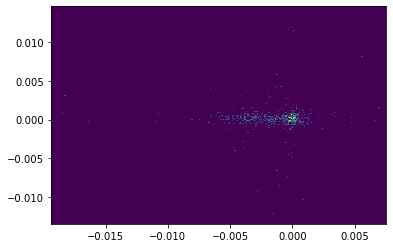

vkb_1 -0.02 274.6498859427126


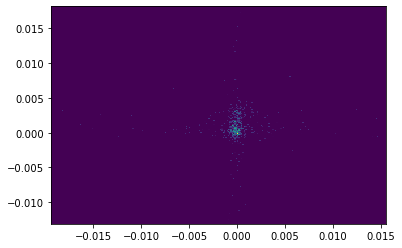

vkb_1 0.02 274.67797430912475


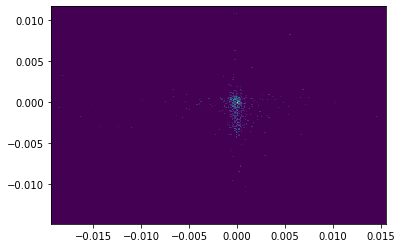

vkb_2 -0.02 274.6786261657562


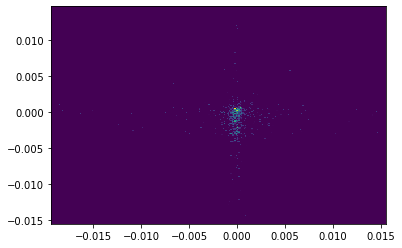

vkb_2 0.02 274.6490943848069


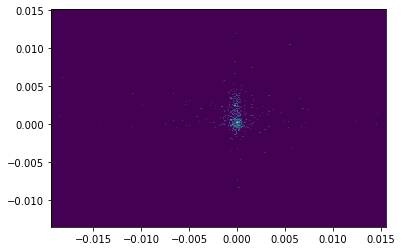

hkb_3 -0.05 274.66374981677893


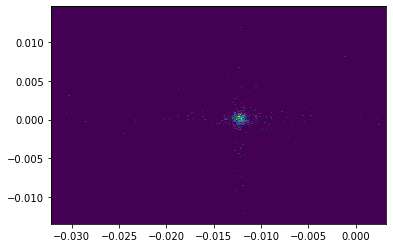

hkb_3 0.05 274.6637498167789


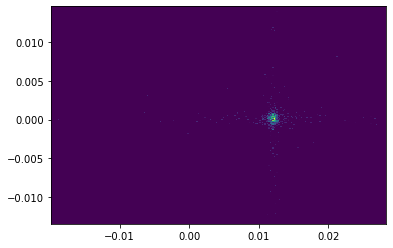

vkb_3 -0.05 274.66374992629227


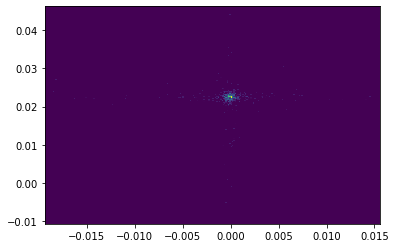

vkb_3 0.05 274.6637499196085


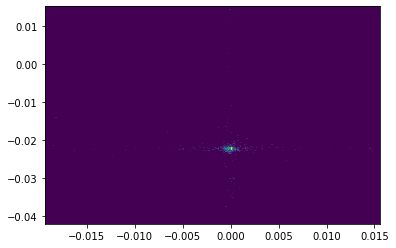

hkb_4 -0.02 274.0664772075204


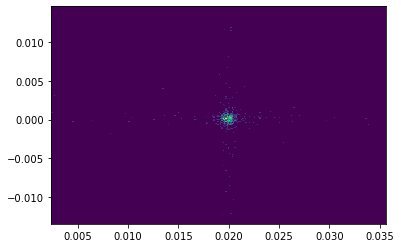

hkb_4 0.02 275.22879315344915


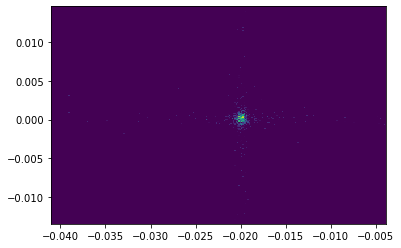

vkb_4 -0.02 274.34335679856633


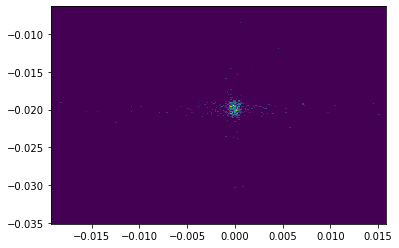

vkb_4 0.02 274.9746034307725


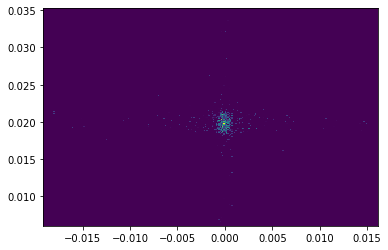

In [26]:
init_range = [[-0.02, 0.02], 
              [-0.02, 0.02],
              [-0.02, 0.02],
              [-0.02, 0.02],
              [-0.05, 0.05],
              [-0.05, 0.05],
              [-0.02, 0.02],
              [-0.02, 0.02]]
for ir, mt in zip(init_range, move_motors):
    for ix in ir:
        focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

        movers.move_motors(focusing_system, mt, ix)
        beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system=focusing_system, random_seed=DEFAULT_RANDOM_SEED)
        print(mt, ix, hist.data_2D.sum())
        plt.figure()
        plt.pcolormesh(hist.hh, hist.vv, hist.data_2D)
        plt.show()
    

  0%|          | 0/5 [00:00<?, ?it/s]

Random guess [0.005012105054453122, -0.0006299688262531508, -0.009031749129847806, 0.013751755413469405, -0.012703680762316698, 0.02635396372699869, -0.013571894258826954, -0.0032487737134889103] has loss 0.04652980817364573
Initial motor position is [ 0.25506361  0.15640413  0.13346825  0.31325176  2.98729632  3.02635396
 -0.01357189 -0.00324877]
Initial loss is 0.04652980817364573


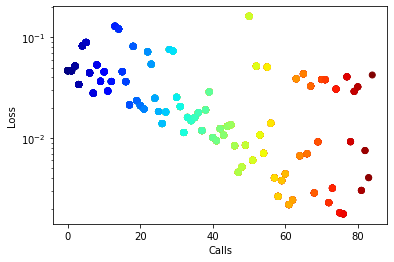

Loss is 0.0017735198124135092 for x [-0.02, 0.0003314993933566067, -0.02, -0.02, -0.019647445744427214, -0.02802941656594027, 0.005304470644652365, 0.002034434676404802] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.02, 0.0003314993933566067, -0.02, -0.02, -0.019647445744427214, -0.02802941656594027, 0.005304470644652365, 0.002034434676404802]
Trying Nelder-Mead from minimum position
Initial loss is 0.04653983899929466
initial guess is [-0.02        0.0003315  -0.02       -0.02       -0.01964745 -0.02802942
  0.00530447  0.00203443]


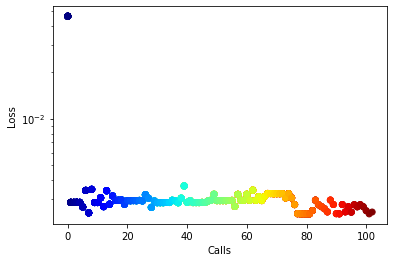

[ final_simplex: (array([[-0.01990625,  0.0003355 , -0.019997  , -0.01987698, -0.0205088 ,
        -0.02804025,  0.00534582,  0.00203046],
       [-0.01994268,  0.00033727, -0.02010397, -0.0198653 , -0.02046821,
        -0.02773312,  0.00539688,  0.00200466],
       [-0.01951976,  0.00033577, -0.0200769 , -0.01990037, -0.0203791 ,
        -0.02781027,  0.00537282,  0.0020525 ],
       [-0.01995272,  0.00033626, -0.02008577, -0.01988887, -0.02040832,
        -0.02778497,  0.0053807 ,  0.00205552],
       [-0.0197697 ,  0.00033583, -0.02006549, -0.01967709, -0.02063068,
        -0.02803422,  0.00535704,  0.00203842],
       [-0.01981524,  0.0003315 , -0.02003351, -0.0197354 , -0.02051364,
        -0.02793791,  0.00546436,  0.00203583],
       [-0.01974606,  0.00034054, -0.02000406, -0.01965993, -0.02034996,
        -0.02802386,  0.00540854,  0.00203386],
       [-0.02014752,  0.00033479, -0.02006085, -0.01957555, -0.0203207 ,
        -0.0278248 ,  0.00535705,  0.00204645],
       [-0.019

 20%|██        | 1/5 [08:42<34:51, 522.94s/it]

Test 0 success True
Random guess [-0.013388631716041356, 0.001977833043262253, -0.01177871302739796, 0.012351802416938121, 0.04477302087194855, -0.0040557280561530976, -0.01650752225887567, -0.00960730243036433] has loss 0.03016217757653089
Initial motor position is [ 0.23666287  0.15901193  0.13072129  0.3118518   3.04477302  2.99594427
 -0.01650752 -0.0096073 ]
Initial loss is 0.03016217757653089


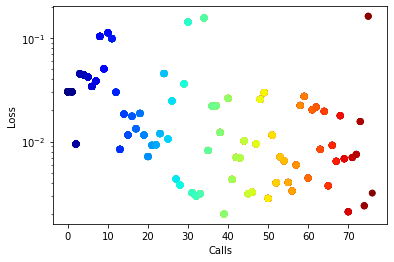

Loss is 0.002002879987872332 for x [0.01285101036879668, 0.002970709666261357, 0.012283139147696753, -0.0038006235090694597, -0.05, 0.021645861664924076, 0.014866937882153593, 0.01825023314783106] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [0.01285101036879668, 0.002970709666261357, 0.012283139147696753, -0.0038006235090694597, -0.05, 0.021645861664924076, 0.014866937882153593, 0.01825023314783106]
Trying Nelder-Mead from minimum position
Initial loss is 0.030341335524547493
initial guess is [ 0.01285101  0.00297071  0.01228314 -0.00380062 -0.05        0.02164586
  0.01486694  0.01825023]


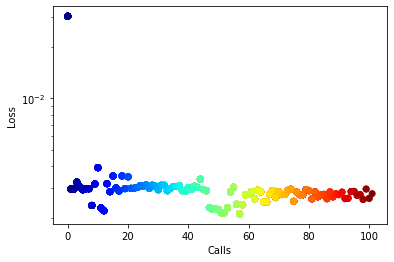

[ final_simplex: (array([[ 0.01290741,  0.00298079,  0.01280354, -0.00381057, -0.05008592,
         0.02171695,  0.01491916,  0.01795385],
       [ 0.01299069,  0.00300202,  0.01257063, -0.00383971, -0.0504994 ,
         0.02187325,  0.01502423,  0.01738827],
       [ 0.01284246,  0.00300733,  0.01271944, -0.00382793, -0.04950232,
         0.02213549,  0.01509973,  0.01762917],
       [ 0.01293838,  0.0029796 ,  0.01280421, -0.00383821, -0.05035237,
         0.02205449,  0.01500321,  0.0174936 ],
       [ 0.01292977,  0.0030478 ,  0.01280067, -0.00383549, -0.04980917,
         0.02192971,  0.01489603,  0.0175077 ],
       [ 0.01302804,  0.00297835,  0.01284231, -0.00381177, -0.04972785,
         0.0220796 ,  0.01495387,  0.01748019],
       [ 0.01297278,  0.00297988,  0.01261618, -0.00383727, -0.04979329,
         0.02231847,  0.01488166,  0.01776631],
       [ 0.0130426 ,  0.00301368,  0.01270716, -0.0038087 , -0.0500133 ,
         0.02200203,  0.01496917,  0.01764717],
       [ 0.013

 40%|████      | 2/5 [16:57<25:18, 506.13s/it]

Test 1 success True
Random guess [-0.005402630194040138, 0.011937170950805768, -0.007366214270746898, -0.008240856412713216, 0.02510019600681987, 0.01097172571851418, -0.00990646057923096, -0.015281706191787984] has loss 0.029878267193815408
Initial motor position is [ 0.24464887  0.16897127  0.13513379  0.29125914  3.0251002   3.01097173
 -0.00990646 -0.01528171]
Initial loss is 0.029878267193815408


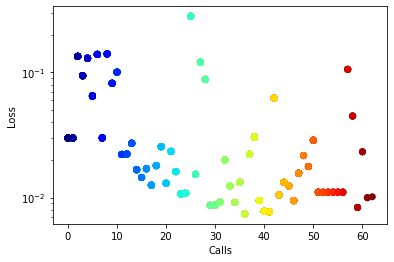

Loss is 0.007415099750271185 for x [-0.02, 0.02, -0.00828177540503996, 0.02, 0.009735455809018412, 0.010691791216585575, 0.016570750110409604, 0.018566488960833936] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.02, 0.02, -0.00828177540503996, 0.02, 0.009735455809018412, 0.010691791216585575, 0.016570750110409604, 0.018566488960833936]
Trying Nelder-Mead from minimum position
Initial loss is 0.029806863479692077
initial guess is [-0.02        0.02       -0.00828178  0.02        0.00973546  0.01069179
  0.01657075  0.01856649]


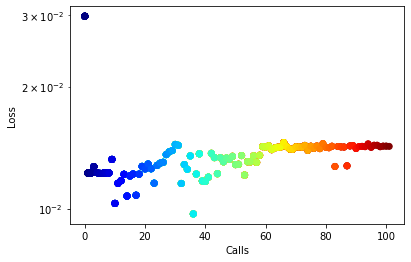

[ final_simplex: (array([[-0.01986841,  0.01934204, -0.00840562,  0.02029907,  0.00988104,
         0.01085167,  0.01637252,  0.0190617 ],
       [-0.01967387,  0.01959208, -0.00836956,  0.02018921,  0.00995715,
         0.01074362,  0.01638721,  0.01922284],
       [-0.01962506,  0.01957722, -0.00844864,  0.02043819,  0.00994435,
         0.01075019,  0.01629899,  0.01914938],
       [-0.01944214,  0.01947306, -0.00840611,  0.02044181,  0.00995757,
         0.0107282 ,  0.01632512,  0.01906544],
       [-0.0198064 ,  0.01922864, -0.0084413 ,  0.02038617,  0.0099376 ,
         0.01063712,  0.01629545,  0.01933493],
       [-0.01984912,  0.01969442, -0.00842377,  0.0203429 ,  0.00990237,
         0.0105752 ,  0.01634347,  0.01910239],
       [-0.01952199,  0.01949207, -0.00844708,  0.02035208,  0.00979973,
         0.01071233,  0.01650862,  0.0193779 ],
       [-0.01969284,  0.01961965, -0.00836917,  0.02033108,  0.00987849,
         0.01076204,  0.01626102,  0.01928082],
       [-0.019

 60%|██████    | 3/5 [29:41<20:47, 624.00s/it]

Test 2 success True
Random guess [0.0028623922763575185, -0.013169522767365072, 0.006406039744397397, -0.008167173699111041, 0.03154279565920111, 0.00012283378682809154, -0.015079917751359528, 0.01203561512787198] has loss 0.035005527433768044
Initial motor position is [ 0.25291389  0.14386458  0.14890604  0.29133283  3.0315428   3.00012283
 -0.01507992  0.01203562]
Initial loss is 0.035005527433768044


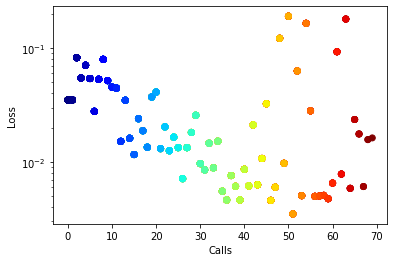

Loss is 0.0034960384217288107 for x [0.02, 0.01710374418762096, -0.02, 0.02, -0.05, -0.00019178745883082632, 0.012537294317607504, -0.012564790425743792] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [0.02, 0.01710374418762096, -0.02, 0.02, -0.05, -0.00019178745883082632, 0.012537294317607504, -0.012564790425743792]
Trying Nelder-Mead from minimum position
Initial loss is 0.034760277242136685
initial guess is [ 0.02        0.01710374 -0.02        0.02       -0.05       -0.00019179
  0.01253729 -0.01256479]


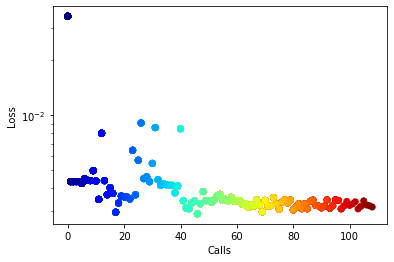

[ final_simplex: (array([[ 0.02079655,  0.01721945, -0.02135671,  0.02015226, -0.04769467,
        -0.00019116,  0.01239798, -0.01209622],
       [ 0.02125193,  0.01704913, -0.02120603,  0.01994762, -0.04784947,
        -0.0001921 ,  0.01222367, -0.01208096],
       [ 0.02084006,  0.01698596, -0.02109076,  0.02029778, -0.04838094,
        -0.00018978,  0.01233195, -0.01214569],
       [ 0.02077005,  0.0170945 , -0.02124827,  0.02021531, -0.04828924,
        -0.00019261,  0.01219457, -0.01194457],
       [ 0.02082326,  0.01682024, -0.02123448,  0.02013297, -0.04769874,
        -0.00019247,  0.01228336, -0.01226125],
       [ 0.0207704 ,  0.01716169, -0.02101395,  0.0201385 , -0.04757479,
        -0.00019135,  0.01234857, -0.01215787],
       [ 0.02075093,  0.01694673, -0.02125083,  0.01989368, -0.04792555,
        -0.00019331,  0.01247595, -0.01202317],
       [ 0.02073462,  0.017139  , -0.02125731,  0.01994233, -0.04822062,
        -0.00019099,  0.01226616, -0.01213628],
       [ 0.020

 80%|████████  | 4/5 [40:58<10:44, 644.74s/it]

Test 3 success True
Random guess [0.018661442581577006, 0.0024455147711243616, 0.0025878986850750955, 0.013883247581912287, -0.04176273625193057, -0.0243363062485102, 0.008118798028591962, -0.011832580233532926] has loss 0.1232159775390404
Initial motor position is [ 0.26871294  0.15947961  0.1450879   0.31338325  2.95823726  2.97566369
  0.0081188  -0.01183258]
Initial loss is 0.1232159775390404


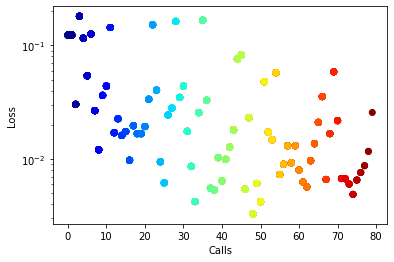

Loss is 0.003285011882494431 for x [-0.02, 0.02, -0.018207950934960488, 0.0033186139569635516, 0.04748554133843895, 0.05, -0.00850913205656599, 0.02] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.02, 0.02, -0.018207950934960488, 0.0033186139569635516, 0.04748554133843895, 0.05, -0.00850913205656599, 0.02]
Trying Nelder-Mead from minimum position
Initial loss is 0.12302882839872745
initial guess is [-0.02        0.02       -0.01820795  0.00331861  0.04748554  0.05
 -0.00850913  0.02      ]


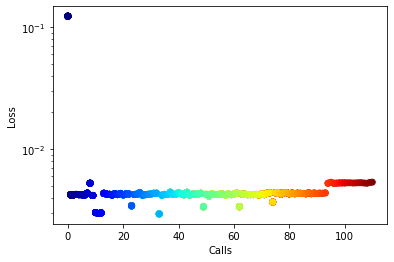

[ final_simplex: (array([[-0.02005859,  0.02005859, -0.01826129,  0.00332834,  0.04762466,
         0.04941406, -0.00853406,  0.02082422],
       [-0.02019962,  0.0202134 , -0.01826653,  0.00333187,  0.04788638,
         0.04892272, -0.00855071,  0.02067719],
       [-0.02014359,  0.02016738, -0.01826913,  0.00329395,  0.04780092,
         0.04912017, -0.00859658,  0.02057847],
       [-0.02015677,  0.02015677, -0.01835067,  0.00334463,  0.04785775,
         0.04843232, -0.00857583,  0.0205297 ],
       [-0.02012047,  0.02015938, -0.01811763,  0.00334533,  0.04773931,
         0.04919847, -0.00857992,  0.02053932],
       [-0.02017983,  0.02018898, -0.01826541,  0.00333127,  0.04784654,
         0.04899129, -0.00845989,  0.02064291],
       [-0.02025281,  0.02009308, -0.01829269,  0.00333406,  0.04767009,
         0.04934508, -0.00854874,  0.02046601],
       [-0.0202291 ,  0.01994764, -0.01828211,  0.00332809,  0.04801756,
         0.04882928, -0.00854099,  0.02072392],
       [-0.020

100%|██████████| 5/5 [51:54<00:00, 622.97s/it]

Test 4 success True


In [29]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []

init_range = [[-0.02, 0.02], 
              [-0.02, 0.02],
              [-0.02, 0.02],
              [-0.02, 0.02],
              [-0.05, 0.05],
              [-0.05, 0.05],
              [-0.02, 0.02],
              [-0.02, 0.02]]


for outer in tqdm(range(N_RUNS)):
    focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
    opt_trial = SkoptGaussianProcessOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              random_seed=DEFAULT_RANDOM_SEED, 
                                              loss_parameters=['centroid', 'fwhm'],
                                              loss_min_value=5e-4,
                                              use_gaussian_fit=False)
    random_inits = opt_trial.get_random_init(guess_range=init_range)
    
    absolute_movements.append(initial_absolute_positions + random_inits)
    
    print("Initial motor position is", absolute_movements[-1])
    opt_trial.initial_motor_positions =  absolute_movements[-1]
    #deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'] / configs.DEFAULT_MOTOR_RESOLUTIONS['hkb_4'])
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    deadline_callback = DeadlineStopper(300)
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call, deadline_callback], 
                                    bounds = init_range,
                                    xi=5e-4, kappa=0.1, n_calls=100)
                                    #bounds=init_range)
    opt_results, guesses, solution, success = opt_trial.trials(verbose=False)
    print("Solution is", solution)
    plot_callback.close()
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                             absolute_movements[-1],
                                             movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                   motor_types=move_motors, 
                                   random_seed=DEFAULT_RANDOM_SEED, 
                                   loss_parameters=['centroid', 'fwhm'],
                                   loss_min_value=5e-4,
                                   use_gaussian_fit=False)
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call, maxfev=100)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=solution,
                                                                   verbose=False, 
                                                                   accept_all_solutions=True)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        print(opt_results)
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [30]:
initial_out_beams = []
initial_hists = []
initial_dws = []
for mov in absolute_movements:
    focusing_system = movers.move_motors(focusing_system, move_motors, mov, movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system=focusing_system, random_seed=DEFAULT_RANDOM_SEED, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05], nbins=512)
    initial_out_beams.append(beam)
    initial_hists.append(hist)
    initial_dws.append(dw)

In [31]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [32]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob, xrange=[-0.05, 0.05], yrange=[-0.05, 0.05], nbins=512) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [33]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

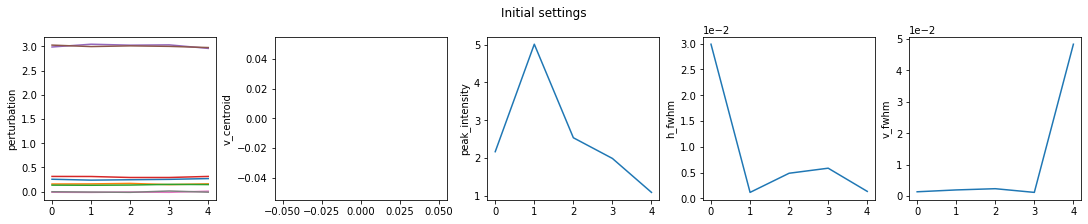

In [34]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

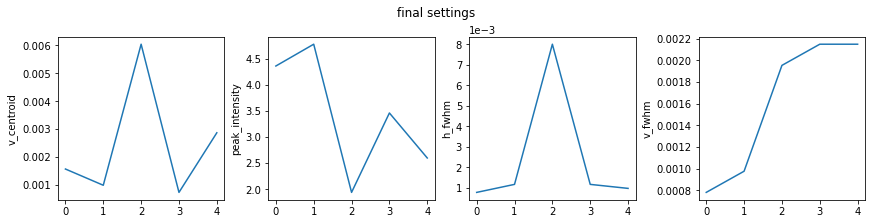

In [35]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

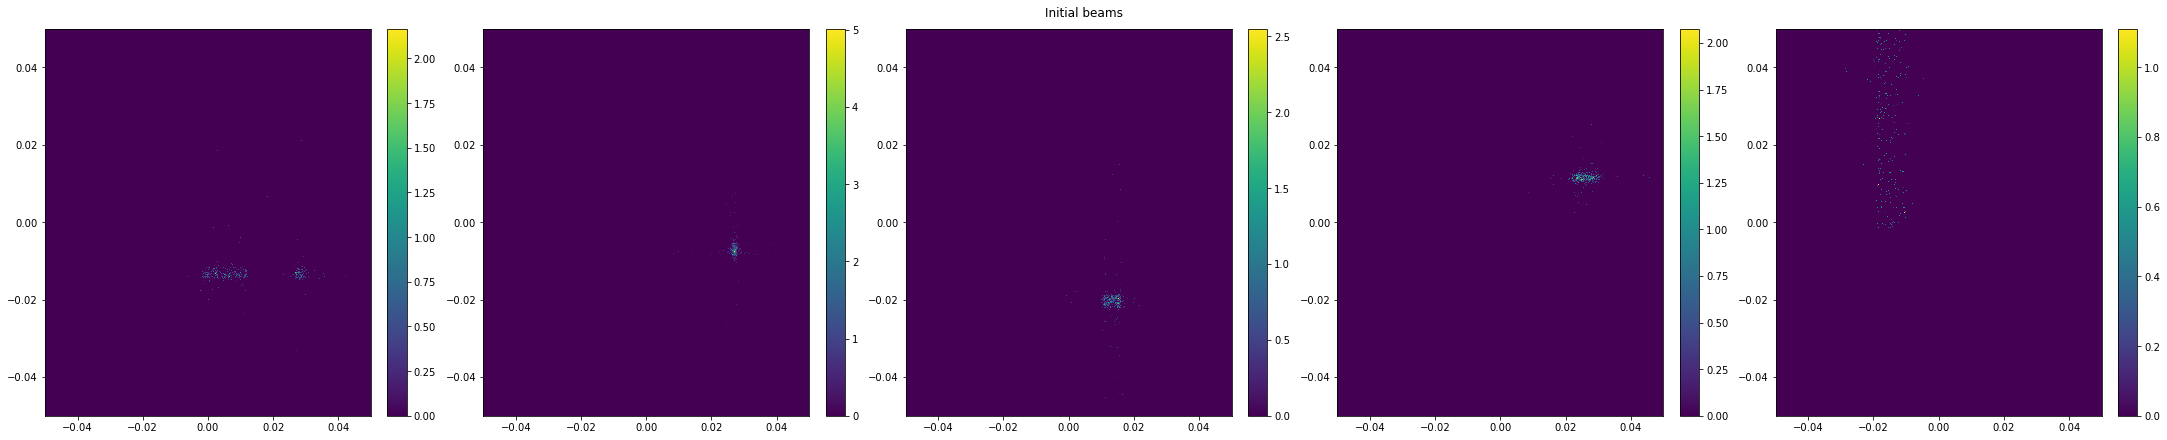

In [38]:
fig, axes = plt.subplots(1, 5, figsize=[30,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    plt.subplot(1, 5, ix + 1)
    plt.pcolormesh(h.hh, h.vv, h.data_2D)
    plt.colorbar()
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

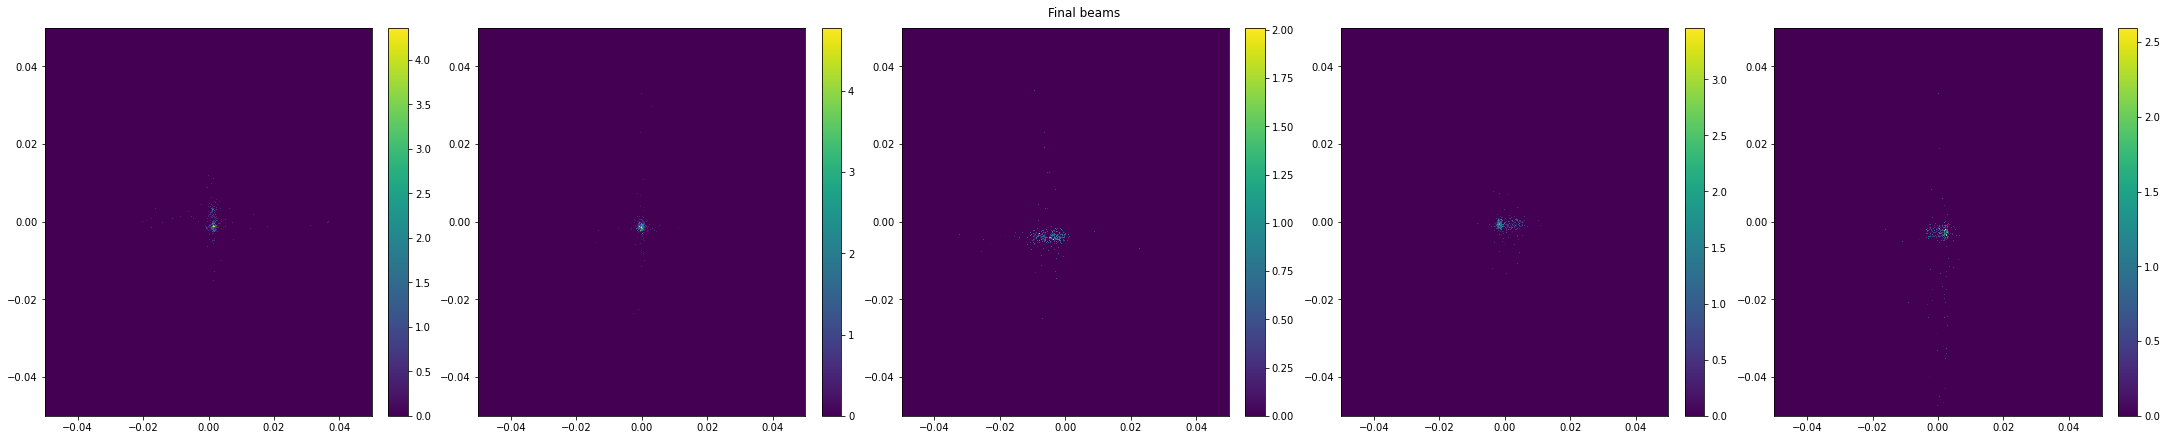

In [39]:
fig, axes = plt.subplots(1, 5, figsize=[30,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    plt.subplot(1, 5, ix + 1)
    plt.pcolormesh(h.hh, h.vv, h.data_2D)
    plt.colorbar()
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')

In [132]:
clean_up()